In [1]:

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas                                      #to read and manipulate data
import zipfile                                     #to extract data
import numpy as np                                 #for matrix operations
#read will be imported as and when required
#read the train and test zip file


In [6]:
train_data = pandas.read_csv("train.csv",error_bad_lines=False)

#Print all rows and columns. Dont hide any
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)

print(train_data.head(5))

b'Skipping line 188321: expected 132 fields, saw 133\nSkipping line 188322: expected 132 fields, saw 133\nSkipping line 188323: expected 132 fields, saw 133\nSkipping line 188324: expected 132 fields, saw 133\nSkipping line 188325: expected 132 fields, saw 133\nSkipping line 188326: expected 132 fields, saw 133\nSkipping line 188327: expected 132 fields, saw 133\nSkipping line 188328: expected 132 fields, saw 133\nSkipping line 188329: expected 132 fields, saw 133\nSkipping line 188330: expected 132 fields, saw 133\nSkipping line 188331: expected 132 fields, saw 133\nSkipping line 188332: expected 132 fields, saw 133\nSkipping line 188333: expected 132 fields, saw 133\nSkipping line 188334: expected 132 fields, saw 133\nSkipping line 188335: expected 132 fields, saw 133\nSkipping line 188336: expected 132 fields, saw 133\nSkipping line 188337: expected 132 fields, saw 133\nSkipping line 188338: expected 132 fields, saw 133\nSkipping line 188339: expected 132 fields, saw 133\nSkipping l

     id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1.0    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2.0    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5.0    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10.0    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11.0    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 

In [7]:
print(train_data.shape)                                  #number of training datapoints given and features.


(188319, 132)


In [8]:
import copy
test_data = copy.deepcopy(train_data.iloc[150000:])
train_data = train_data.iloc[:150000]

In [9]:
y_true = test_data['loss']

#print the first 5 entries of test data also.
print(test_data.head(5))

              id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11  \
150000  467729.0    A    A    A    A    A    B    A    A    A     A     A   
150001  467734.0    A    B    A    A    B    A    A    A    B     B     A   
150002  467739.0    A    B    A    A    A    A    A    A    B     B     B   
150003  467740.0    A    A    A    A    A    B    A    A    A     A     A   
150004  467743.0    A    B    A    A    A    A    A    A    B     A     B   

       cat12 cat13 cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22  \
150000     A     A     A     A     A     A     A     A     A     A     A   
150001     A     B     A     A     A     A     A     A     A     A     A   
150002     B     B     A     A     A     A     A     A     A     A     A   
150003     A     A     A     A     A     A     A     A     A     A     A   
150004     A     A     A     A     A     A     A     A     A     A     A   

       cat23 cat24 cat25 cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33  \
1500

In [10]:
print(train_data.describe())     

                  id          cont1          cont2          cont3  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean   234490.288887       0.493660       0.507320       0.498990   
std    134937.378713       0.187537       0.207229       0.202252   
min         1.000000       0.000016       0.001149       0.002634   
25%    117537.750000       0.346090       0.358319       0.336963   
50%    234497.500000       0.475784       0.555782       0.527991   
75%    351272.000000       0.623912       0.681761       0.634224   
max    467728.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        0.491802       0.487722       0.490615       0.484894   
std         0.211373       0.209136       0.205168       0.178525   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.2811

In [11]:
print(train_data.skew())


id       -0.004008
cont1     0.517909
cont2    -0.312079
cont3    -0.010250
cont4     0.415957
cont5     0.680679
cont6     0.464061
cont7     0.828456
cont8     0.679399
cont9     1.074892
cont10    0.356928
cont11    0.282640
cont12    0.293526
cont13    0.385175
cont14    0.243783
loss      3.901837
dtype: float64


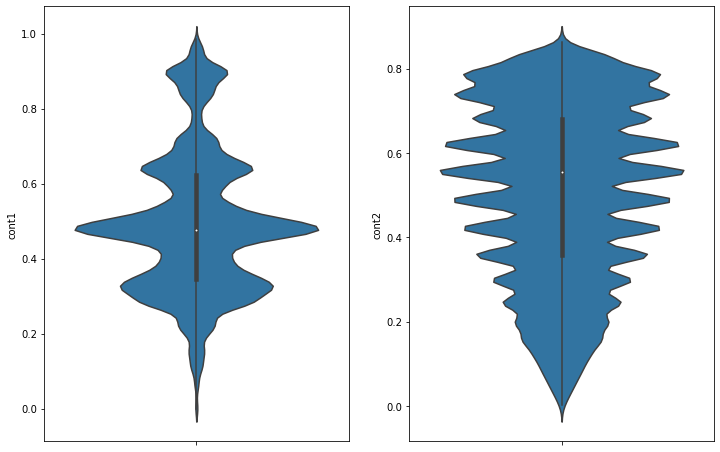

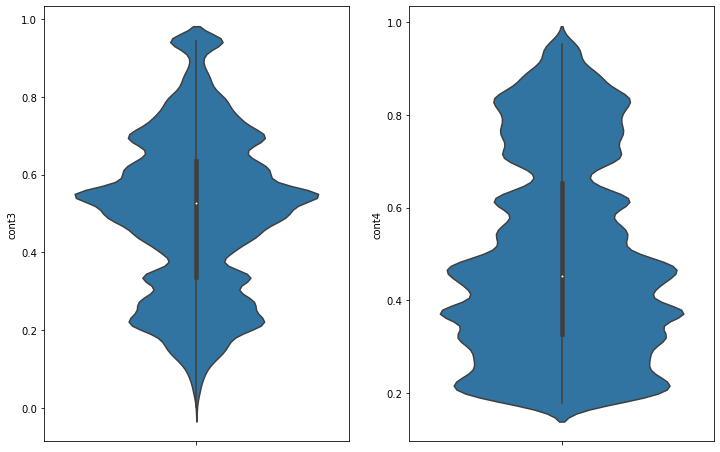

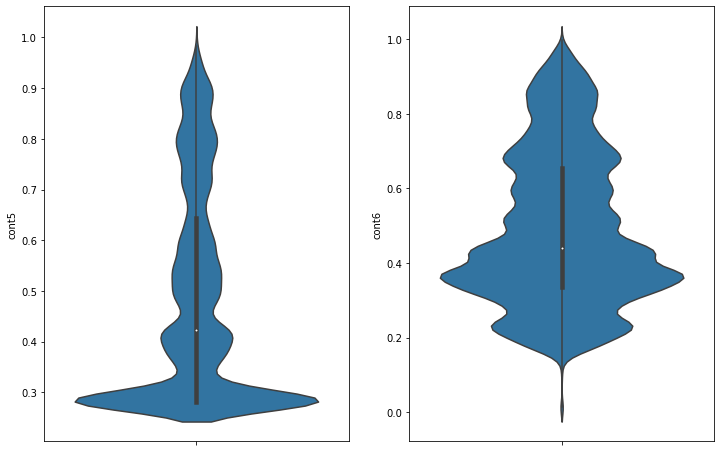

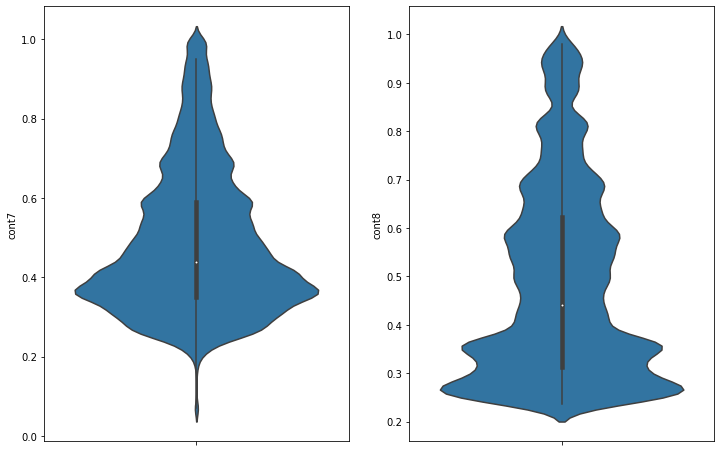

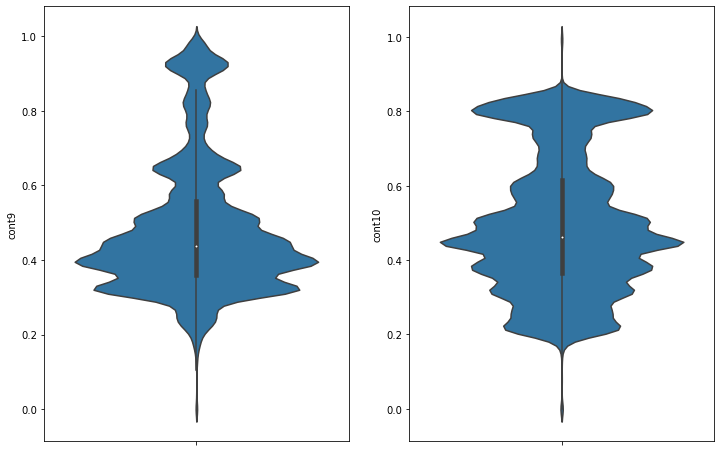

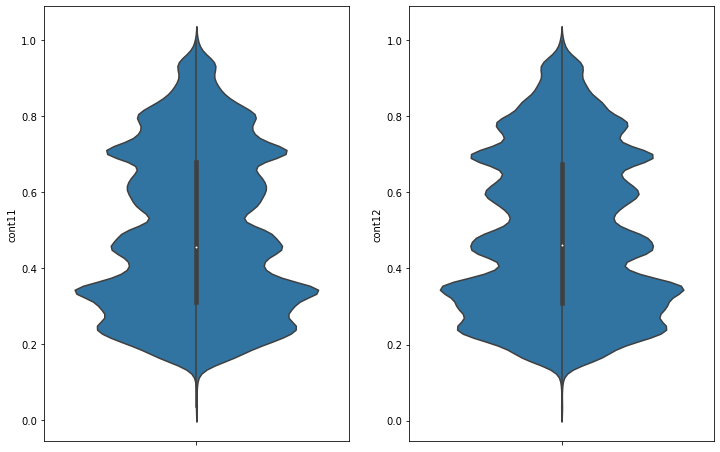

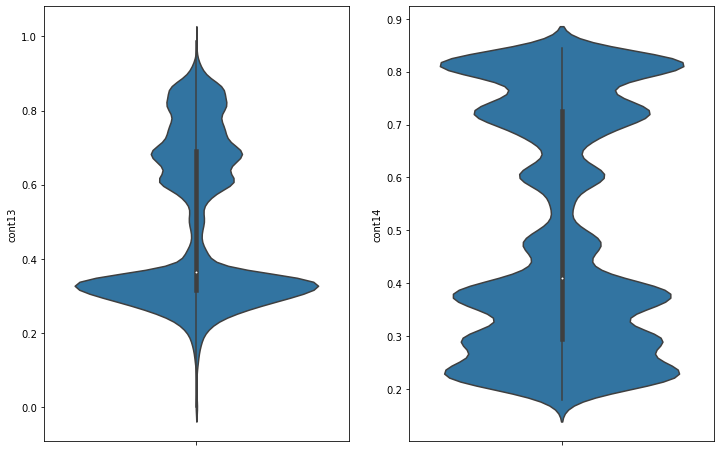

In [12]:
# We will visualize all the continuous attributes using Violin Plot - a combination of box and density plots

#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

#range of features considered
split = 117

#number of features considered
size = 15

#create a dataframe with only continuous features
data=train_data.iloc[:,split:] 

#get the names of all the columns
cols=data.columns 

#Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=train_data, ax=ax[j])
plt.show()

In [14]:
print(test_data.shape)                                 #number of testing datapoints given and its features.
print(test_data.head(5))


(38319, 132)
              id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11  \
150000  467729.0    A    A    A    A    A    B    A    A    A     A     A   
150001  467734.0    A    B    A    A    B    A    A    A    B     B     A   
150002  467739.0    A    B    A    A    A    A    A    A    B     B     B   
150003  467740.0    A    A    A    A    A    B    A    A    A     A     A   
150004  467743.0    A    B    A    A    A    A    A    A    B     A     B   

       cat12 cat13 cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22  \
150000     A     A     A     A     A     A     A     A     A     A     A   
150001     A     B     A     A     A     A     A     A     A     A     A   
150002     B     B     A     A     A     A     A     A     A     A     A   
150003     A     A     A     A     A     A     A     A     A     A     A   
150004     A     A     A     A     A     A     A     A     A     A     A   

       cat23 cat24 cat25 cat26 cat27 cat28 cat29 cat30 cat31 cat32 

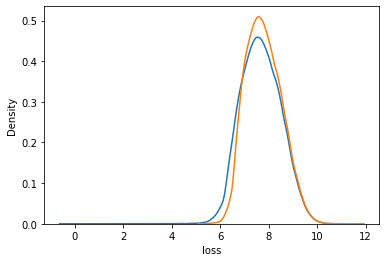

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#shift is another hyper-parameter.
shift = 200

ax = sns.kdeplot(np.log(train_data['loss']),legend= True)                        #to visualize the log loss without shift
ax = sns.kdeplot(np.log(train_data['loss']+shift),legend= True)                  #to visualize the log loss with shift

plt.show()

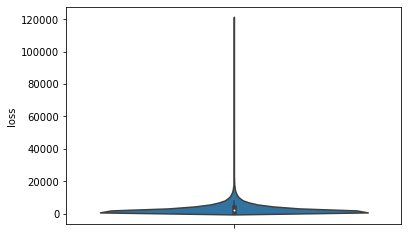

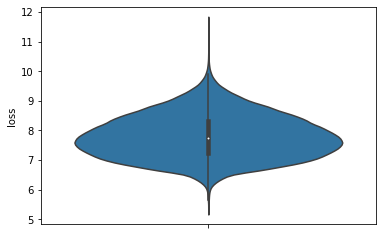

In [16]:
#getting the id column from test set which will be later used for submission
ids = test_data['id']

target = train_data['loss']

#drop the unnecessary column id and loss from both train and test set.
train_data.drop(['id','loss'],1,inplace=True)
test_data.drop(['id','loss'],1,inplace=True)

#violin plot to visualize loss before applying log transformation.
sns.violinplot(data=train_data,y=target)  
plt.show()

target = np.log(target+shift)

#violin plot to visualize loss after applying log transformation.
sns.violinplot(data=train_data,y=target)  
plt.show()

In [17]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.81
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


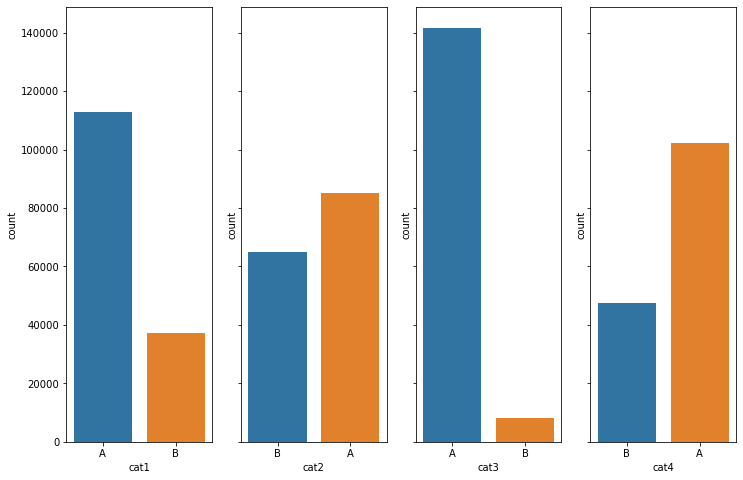

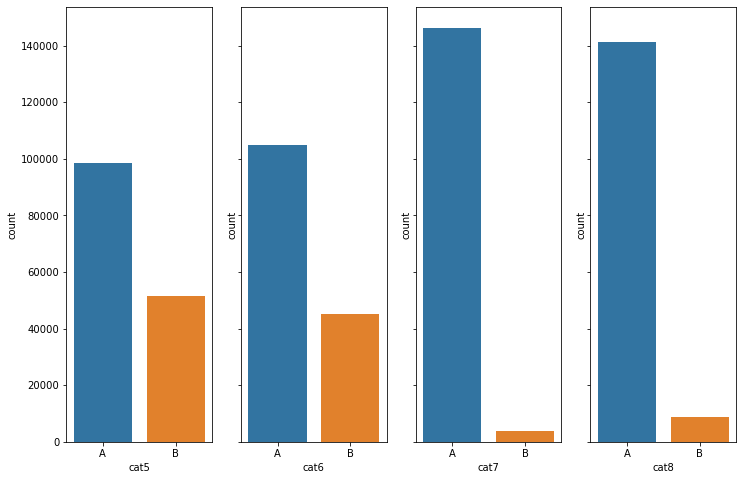

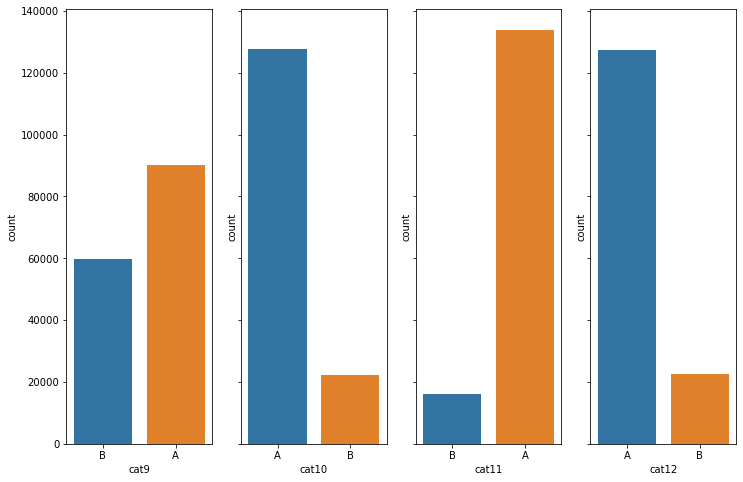

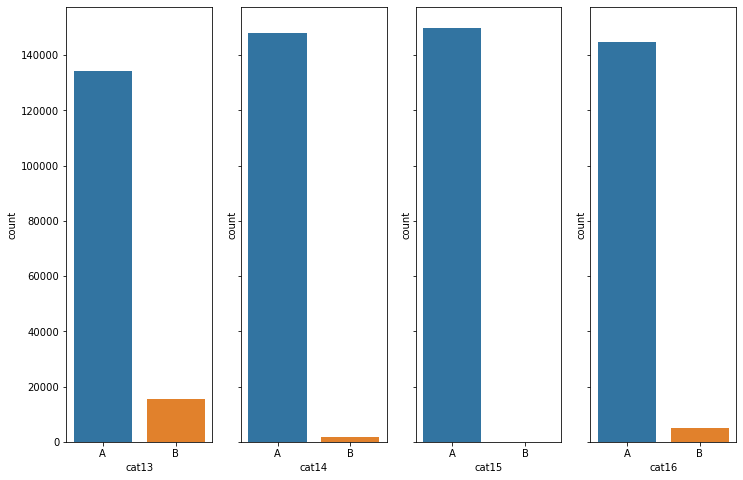

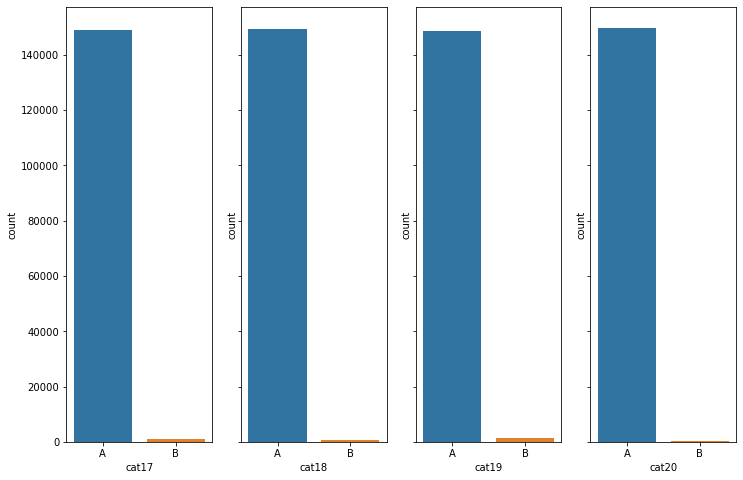

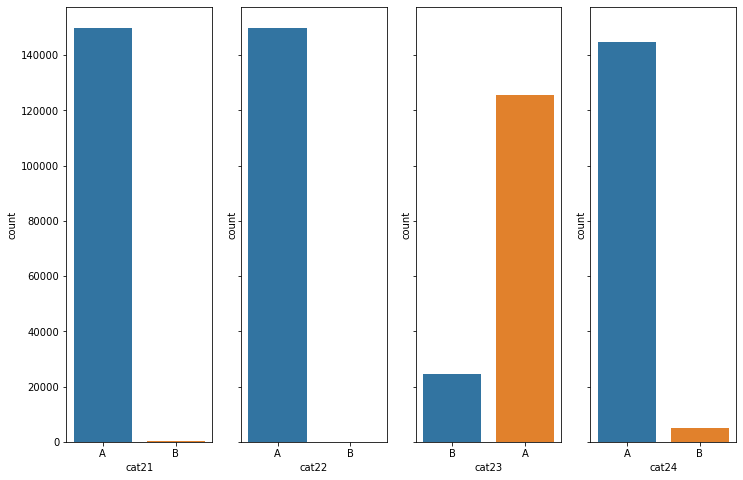

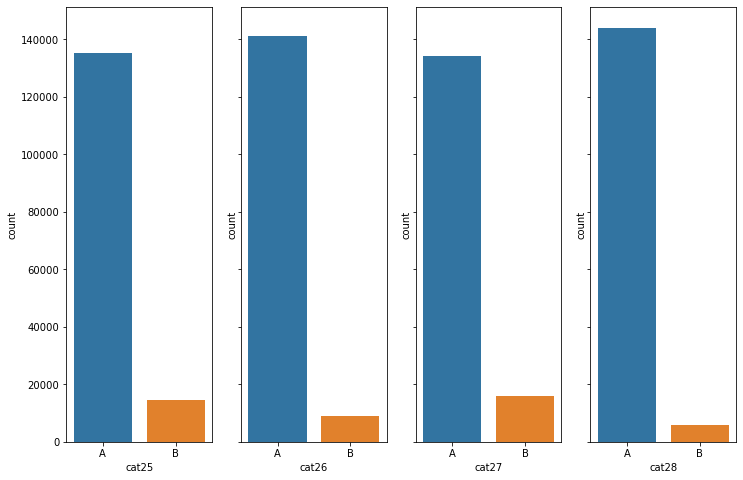

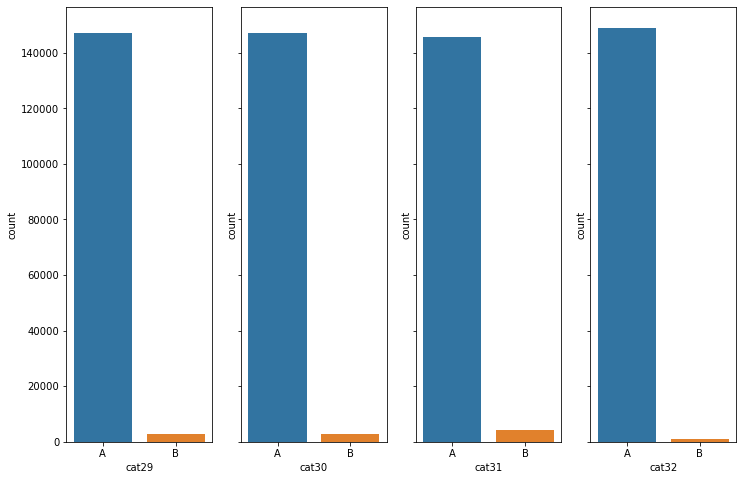

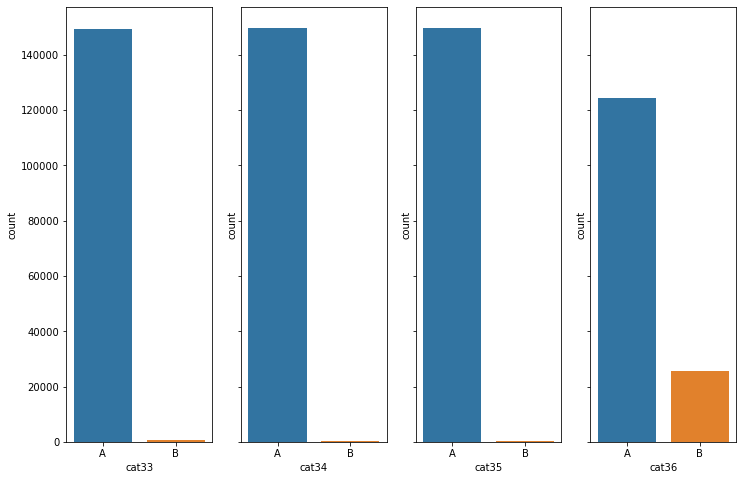

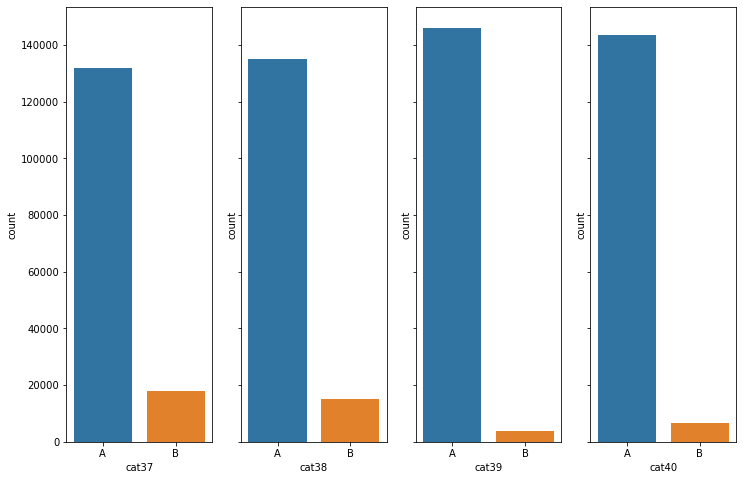

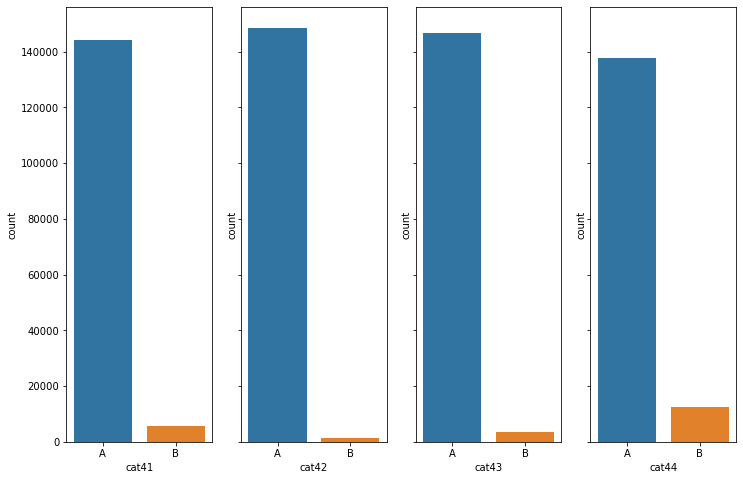

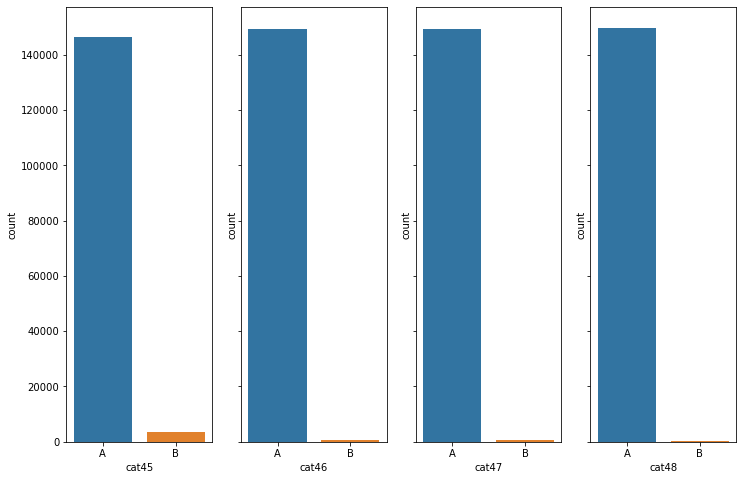

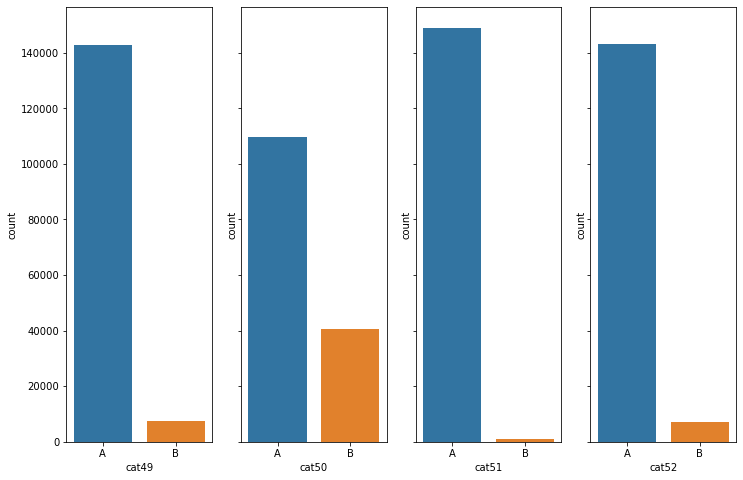

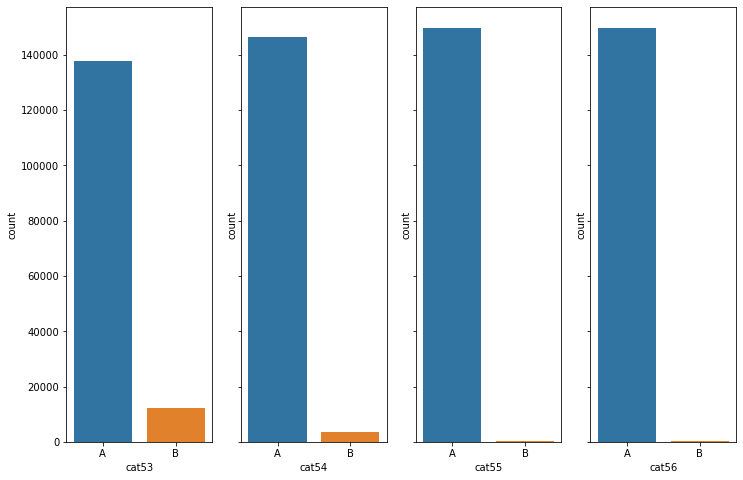

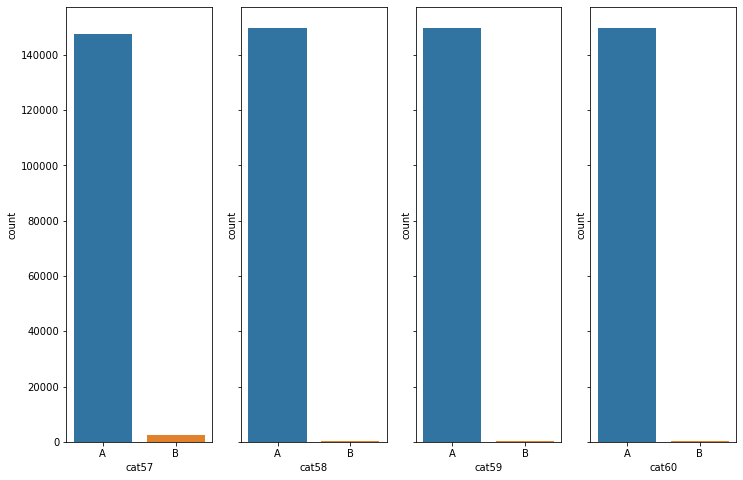

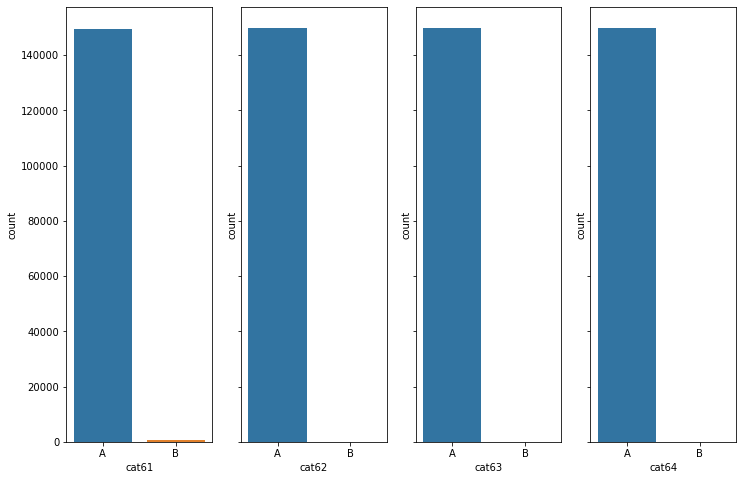

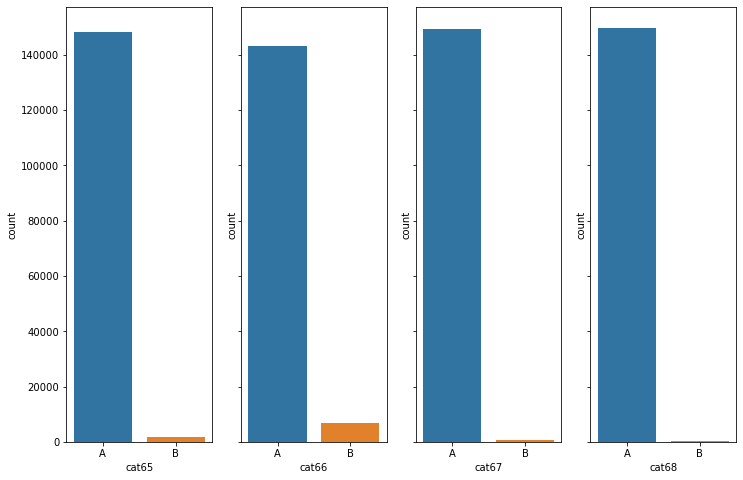

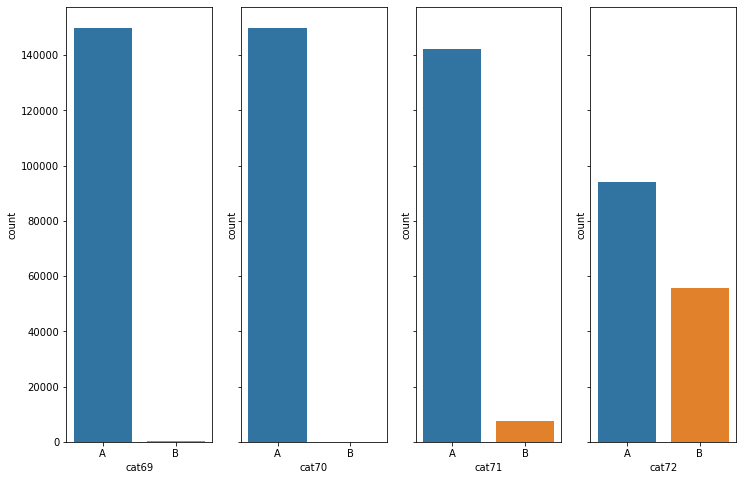

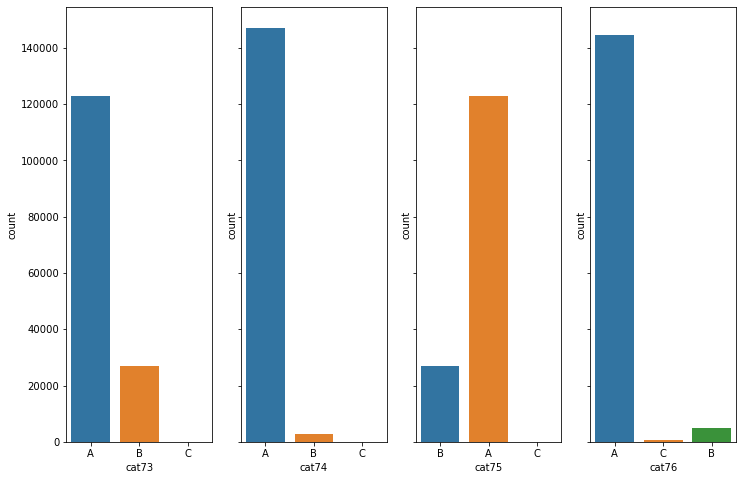

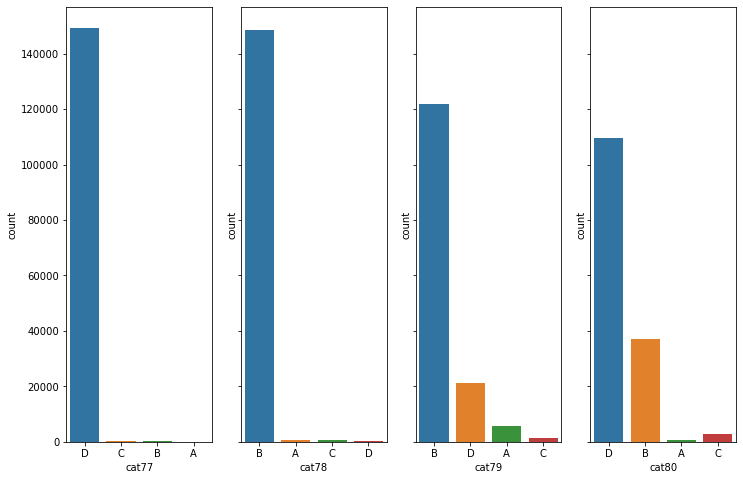

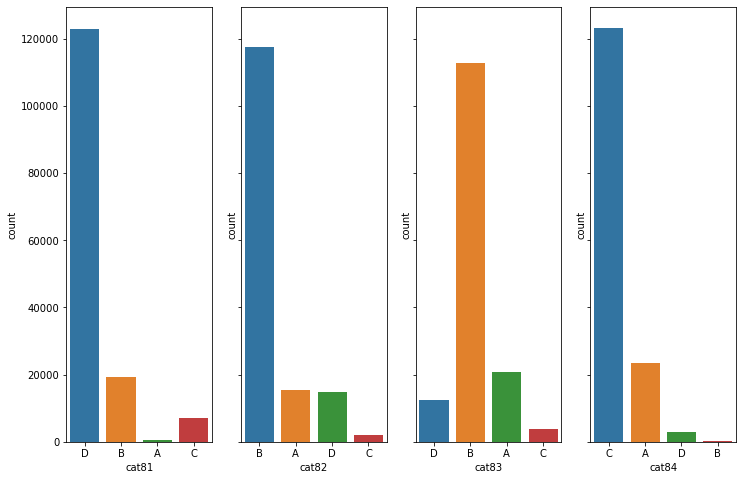

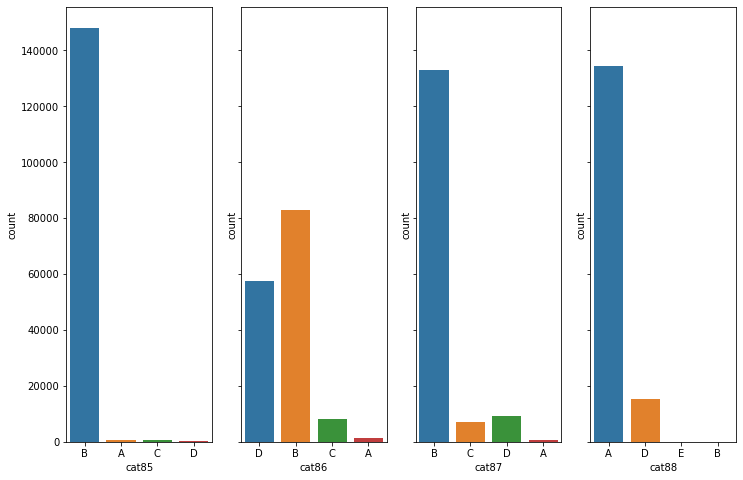

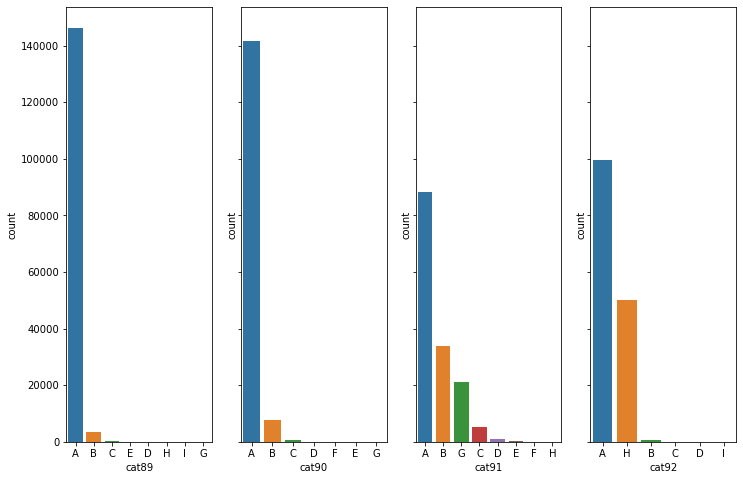

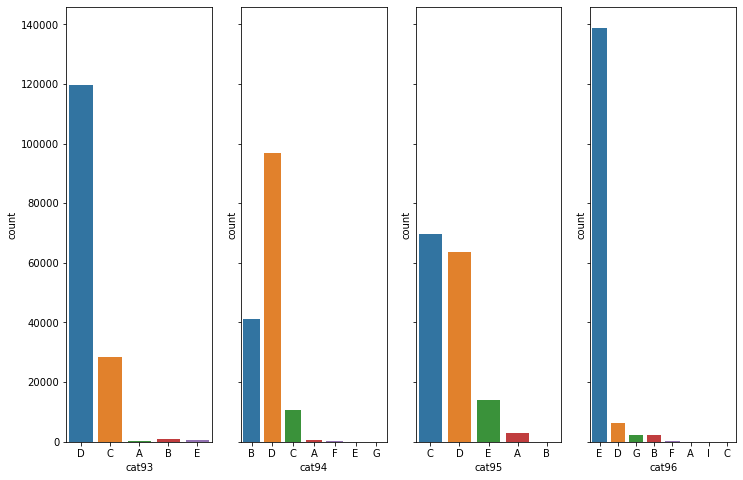

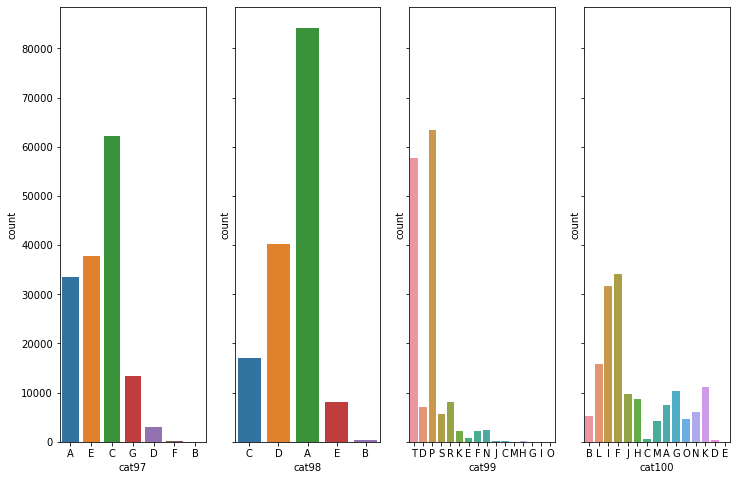

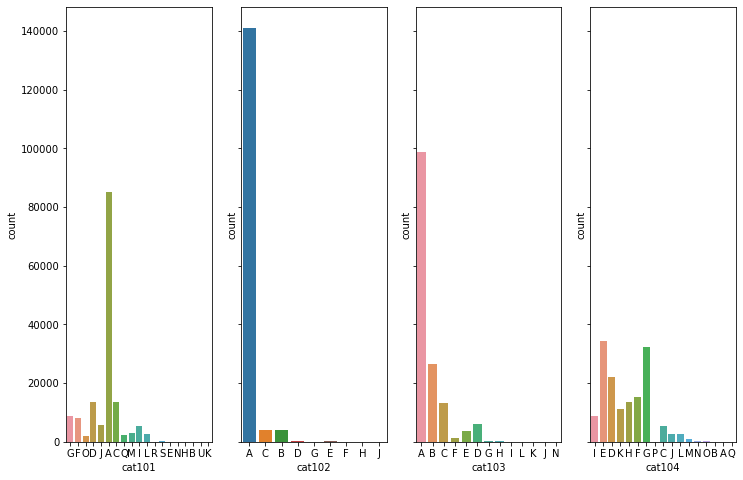

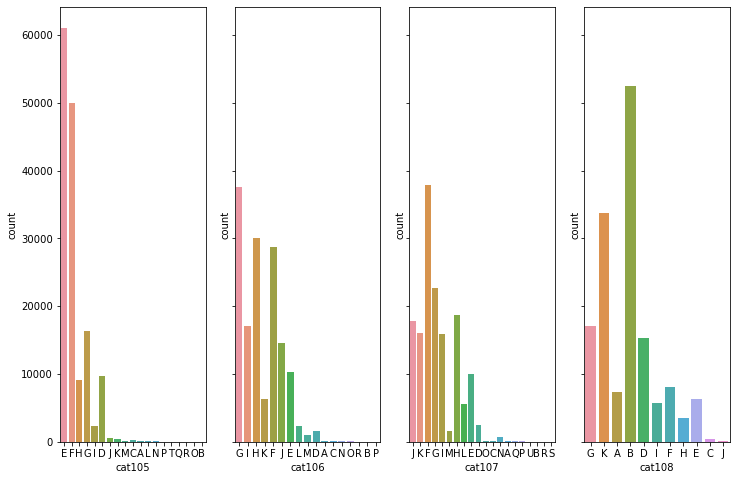

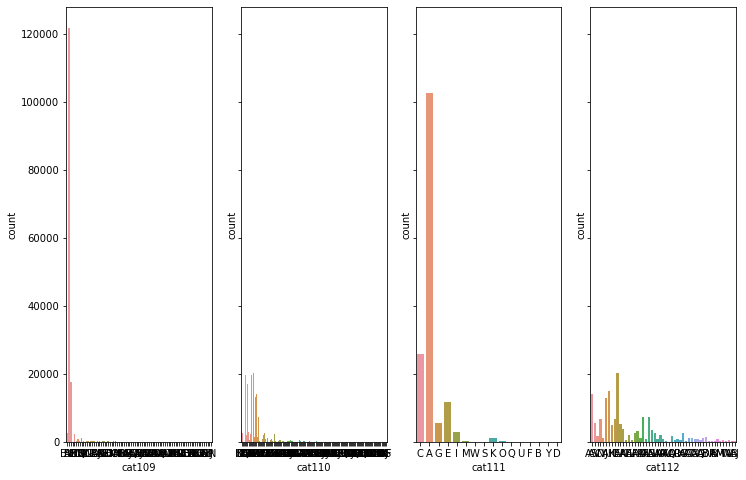

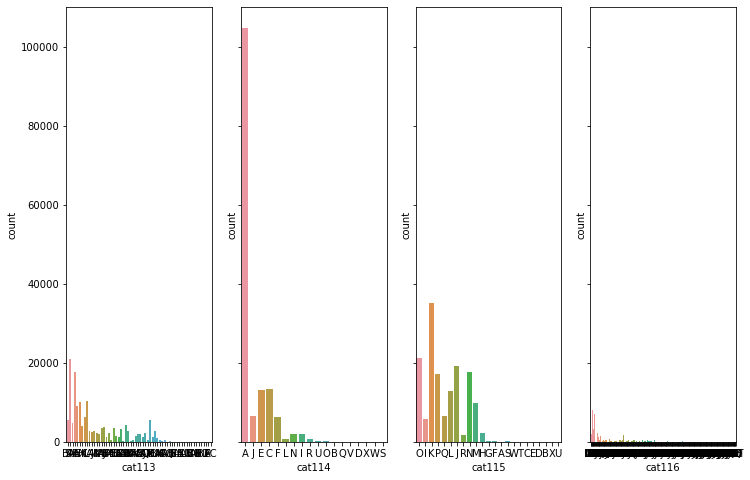

In [18]:
#names of all the columns
cols = train_data.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=train_data, ax=ax[j])
plt.show()

In [19]:
#merging both the datasets to make single joined dataset
joined = pandas.concat([train_data, test_data],ignore_index = True)
del train_data,test_data                                         #deleting previous one to save memory.

cat_feature = [n for n in joined.columns if n.startswith('cat')]  #list of all the features containing categorical values

#factorizing them
for column in cat_feature:
    joined[column] = pandas.factorize(joined[column].values, sort=True)[0]
        
del cat_feature

In [20]:
print (joined.head(5))


   cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  cat11  cat12  \
0     1     2     1     2     1     1     1     1     2      1      2      0   
1     1     2     1     1     1     1     1     1     2      2      1      0   
2     1     2     1     1     2     1     1     1     2      2      2      1   
3     2     2     1     2     1     1     1     1     2      1      1      0   
4     1     2     1     2     1     1     1     1     2      2      1      1   

   cat13  cat14  cat15  cat16  cat17  cat18  cat19  cat20  cat21  cat22  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      1      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   cat23  cat24  cat25  cat26  cat27  cat28  cat29  cat30  cat31  ca

In [22]:
#used when submission is made on kaggle

#extracting training and testing data form joined data
'''train_data = joined[joined['loss'].notnull()]
test_data = joined[joined['loss'].isnull()]
del joined
'''

train_data = joined.iloc[:150000,:]
test_data = joined.iloc[150000:,:]
print(test_data.shape)

(38319, 130)


In [23]:
from sklearn.linear_model import LinearRegression           #importing the linear regression

#Set the base model
model = LinearRegression(n_jobs=-1)                         #setting n_jobs to -1 to use all cores available

model.fit(train_data,target)                                #training the model


LinearRegression(n_jobs=-1)

In [25]:
from sklearn.metrics import mean_absolute_error

model.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
train_data.describe()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,1.247320,1.433360,1.054960,1.317440,1.342340,1.301500,1.02456,1.058867,1.399300,1.149347,1.106987,0.151073,0.103800,0.012153,0.000193,0.034480,0.007027,0.005387,0.009453,0.001113,0.002193,0.000247,0.164033,0.033787,0.097247,0.058900,0.106033,0.039353,0.019740,0.018707,0.028253,0.006587,0.005027,0.003053,0.001140,0.169673,0.120093,0.100293,0.026233,0.043547,0.037947,0.008967,0.022500,0.082467,0.022893,0.004573,0.003660,0.001433,0.048907,0.269820,0.006660,0.046793,0.082080,0.024473,0.000813,0.000960,0.016220,0.001340,0.001600,0.002420,0.003780,0.000273,0.000447,0.000267,0.012107,0.044433,0.003640,0.000760,0.001627,0.000120,0.05132,0.371653,0.180053,0.019187,0.180420,0.040767,2.993400,1.002967,1.254820,2.476133,2.682753,1.110953,1.054373,1.702740,1.006840,1.814740,1.167080,0.205860,0.026320,0.059887,1.172253,1.672793,2.795613,2.371947,2.567760,3.940027,2.435260,1.250480,12.461393,7.461160,2.556547,0.098187,0.644267,5.566347,4.777007,6.651887,6.979073,4.505340,30.816427,73.751853,1.113053,23.954500,31.246180,1.455260,11.800793,152.179447,0.493660,0.507320,0.498990,0.491802,0.487722,0.490615,0.484894,0.485975,0.485215,0.497761,0.493302,0.492966,0.492626,0.496251
std,0.431456,0.495541,0.227903,0.465482,0.474494,0.458911,0.15478,0.235376,0.489756,0.356431,0.309097,0.358122,0.305002,0.109571,0.013903,0.182459,0.083530,0.073196,0.096768,0.033348,0.046782,0.015704,

In [27]:
 np.isnan(train_data).any()


cat1      False
cat2      False
cat3      False
cat4      False
cat5      False
cat6      False
cat7      False
cat8      False
cat9      False
cat10     False
cat11     False
cat12     False
cat13     False
cat14     False
cat15     False
cat16     False
cat17     False
cat18     False
cat19     False
cat20     False
cat21     False
cat22     False
cat23     False
cat24     False
cat25     False
cat26     False
cat27     False
cat28     False
cat29     False
cat30     False
cat31     False
cat32     False
cat33     False
cat34     False
cat35     False
cat36     False
cat37     False
cat38     False
cat39     False
cat40     False
cat41     False
cat42     False
cat43     False
cat44     False
cat45     False
cat46     False
cat47     False
cat48     False
cat49     False
cat50     False
cat51     False
cat52     False
cat53     False
cat54     False
cat55     False
cat56     False
cat57     False
cat58     False
cat59     False
cat60     False
cat61     False
cat62     False
cat63   